In [1]:
%matplotlib inline
import os
import pandas as pd
from zipline.data import bundles
from zipline.data.data_portal import DataPortal
from zipline.utils.calendars import get_calendar
from zipline.utils.run_algo import load_extensions

# Load extensions.py; this allows you access to custom bundles
load_extensions(
    default=True,
    extensions=[],
    strict=True,
    environ=os.environ,
)

/anaconda3/envs/env_zipline/lib/python3.5/site-packages/empyrical/utils.py:32: UserWarning: Unable to import pandas_datareader. Suppressing import error and continuing. All data reading functionality will raise errors; but has been deprecated and will be removed in a later version.
  warnings.warn(msg)
<string>:290: UserWarning: Overwriting bundle with name 'futures'


In [2]:
# Set-Up Pricing Data Access
trading_calendar = get_calendar('CME')
bundle = 'futures'
bundle_data = bundles.load(bundle)

In [3]:
data_portal = DataPortal(
    bundle_data.asset_finder,
    trading_calendar=trading_calendar,
    first_trading_day=bundle_data.equity_daily_bar_reader.first_trading_day,
    equity_minute_reader=None,
    equity_daily_reader=bundle_data.equity_daily_bar_reader,
    future_daily_reader=bundle_data.equity_daily_bar_reader,
    adjustment_reader=bundle_data.adjustment_reader,
)

In [4]:
continuous_future = bundle_data.asset_finder.create_continuous_future
history = data_portal.get_history_window

In [5]:
bundle_data.asset_finder.futures_exchanges

Table('futures_exchanges', MetaData(bind=Engine(sqlite:////Users/jonathan/.zipline/data/futures/2018-09-25T15;46;58.796197/assets-6.sqlite)), Column('exchange', TEXT(), table=<futures_exchanges>, primary_key=True, nullable=False), Column('timezone', TEXT(), table=<futures_exchanges>), schema=None)

In [6]:
bundle_data.asset_finder.engine.execute('SELECT * FROM futures_exchanges').fetchall()

[]

In [7]:
cmd_str ='INSERT INTO "futures_exchanges" (exchange, timezone) VALUES ("EXCH","US")'

In [8]:
#bundle_data.asset_finder.engine.execute(cmd_str)

In [12]:
bundle_data.asset_finder.futures_contracts

Table('futures_contracts', MetaData(bind=Engine(sqlite:////Users/jonathan/.zipline/data/futures/2018-09-25T15;46;58.796197/assets-6.sqlite)), Column('sid', INTEGER(), table=<futures_contracts>, primary_key=True, nullable=False), Column('symbol', TEXT(), table=<futures_contracts>), Column('root_symbol', TEXT(), ForeignKey('futures_root_symbols.root_symbol'), table=<futures_contracts>), Column('asset_name', TEXT(), table=<futures_contracts>), Column('start_date', INTEGER(), table=<futures_contracts>, nullable=False), Column('end_date', INTEGER(), table=<futures_contracts>, nullable=False), Column('first_traded', INTEGER(), table=<futures_contracts>), Column('exchange', TEXT(), ForeignKey('futures_exchanges.exchange'), table=<futures_contracts>), Column('notice_date', INTEGER(), table=<futures_contracts>, nullable=False), Column('expiration_date', INTEGER(), table=<futures_contracts>, nullable=False), Column('auto_close_date', INTEGER(), table=<futures_contracts>, nullable=False), Column(

In [13]:
bundle_data.asset_finder.engine.execute('SELECT * FROM futures_contracts LIMIT 10').fetchall()

[(0, 'CLG2015', 'CL', None, 1420156800000000000, 1421712000000000000, -9223372036854775808, 'EXCH', 1421798400000000000, 1424390400000000000, 1421798400000000000, 1.0, 0.0001),
 (1, 'CLH2015', 'CL', None, 1420156800000000000, 1424390400000000000, -9223372036854775808, 'EXCH', 1424476800000000000, 1426809600000000000, 1424476800000000000, 1.0, 0.0001),
 (2, 'CLJ2015', 'CL', None, 1420156800000000000, 1426809600000000000, -9223372036854775808, 'EXCH', 1426896000000000000, 1429228800000000000, 1426896000000000000, 1.0, 0.0001),
 (3, 'CLK2015', 'CL', None, 1420156800000000000, 1429574400000000000, -9223372036854775808, 'EXCH', 1429660800000000000, 1431648000000000000, 1429660800000000000, 1.0, 0.0001),
 (4, 'CLM2015', 'CL', None, 1420156800000000000, 1431993600000000000, -9223372036854775808, 'EXCH', 1432080000000000000, 1434672000000000000, 1432080000000000000, 1.0, 0.0001),
 (5, 'CLN2015', 'CL', None, 1420156800000000000, 1434931200000000000, -9223372036854775808, 'EXCH', 143501760000000

In [14]:
bundle_data.asset_finder.futures_root_symbols

Table('futures_root_symbols', MetaData(bind=Engine(sqlite:////Users/jonathan/.zipline/data/futures/2018-09-25T15;46;58.796197/assets-6.sqlite)), Column('root_symbol', TEXT(), table=<futures_root_symbols>, primary_key=True, nullable=False), Column('root_symbol_id', INTEGER(), table=<futures_root_symbols>), Column('sector', TEXT(), table=<futures_root_symbols>), Column('description', TEXT(), table=<futures_root_symbols>), Column('exchange', TEXT(), ForeignKey('futures_exchanges.exchange'), table=<futures_root_symbols>), schema=None)

In [15]:
bundle_data.asset_finder.engine.execute('SELECT * FROM futures_root_symbols').fetchall()

[('CL', 0, None, None, 'EXCH')]

In [16]:
bundle_data.asset_finder.futures_sids[0:10]

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)

In [17]:
fut = bundle_data.asset_finder.lookup_future_symbol('CLF2016')

In [18]:
fut.to_dict()

{'asset_name': '',
 'auto_close_date': Timestamp('2015-12-22 00:00:00+0000', tz='UTC'),
 'end_date': Timestamp('2015-12-21 00:00:00+0000', tz='UTC'),
 'exchange': 'EXCH',
 'exchange_full': 'EXCH',
 'expiration_date': Timestamp('2016-01-15 00:00:00+0000', tz='UTC'),
 'first_traded': None,
 'multiplier': 1.0,
 'notice_date': Timestamp('2015-12-22 00:00:00+0000', tz='UTC'),
 'root_symbol': 'CL',
 'sid': 11,
 'start_date': Timestamp('2015-01-02 00:00:00+0000', tz='UTC'),
 'symbol': 'CLF2016',
 'tick_size': 0.0001}

In [19]:
cl_contracts = [
    bundle_data.asset_finder.lookup_future_symbol(x)
    for x
    in ['CLF2016', 'CLG2016', 'CLH2016', 'CLJ2016', 'CLK2016', 'CLM2016']
]

In [20]:
cl_contracts

[Future(11 [CLF2016]),
 Future(12 [CLG2016]),
 Future(13 [CLH2016]),
 Future(14 [CLJ2016]),
 Future(15 [CLK2016]),
 Future(16 [CLM2016])]

In [21]:
start_dt = pd.Timestamp('2015-10-21', tz='UTC', offset='C')
#start_dt = pd.Timestamp('2016-01-04', tz='UTC', offset='C')
end_dt = pd.Timestamp('2016-06-01', tz='UTC', offset='C')

end_loc = trading_calendar.closes.index.get_loc(end_dt)
start_loc = trading_calendar.closes.index.get_loc(start_dt)    
    
cl_consecutive_contract_volume = history(
    assets=cl_contracts,
    end_dt=end_dt,
    bar_count=end_loc - start_loc,
    frequency='1d',
    field='volume',
    data_frequency='daily'
)


/anaconda3/envs/env_zipline/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: offset is deprecated. Use freq instead
  """Entry point for launching an IPython kernel.
/anaconda3/envs/env_zipline/lib/python3.5/site-packages/ipykernel_launcher.py:3: FutureWarning: offset is deprecated. Use freq instead
  This is separate from the ipykernel package so we can avoid doing imports until


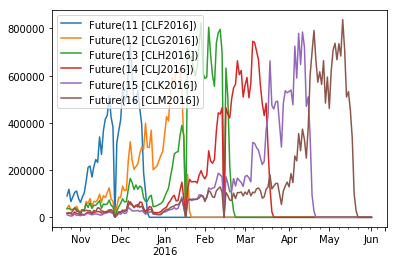

In [22]:
cl_consecutive_contract_volume.plot();

In [23]:
cl_consecutive_contract_volume['4/2016':'5/2016']

,Future(11 [CLF2016]),Future(12 [CLG2016]),Future(13 [CLH2016]),Future(14 [CLJ2016]),Future(15 [CLK2016]),Future(16 [CLM2016])
2016-04-01 00:00:00+00:00,0.0,0.0,0.0,0.0,532508.0,129009.0
2016-04-04 00:00:00+00:00,0.0,0.0,0.0,0.0,539482.0,185098.0
2016-04-05 00:00:00+00:00,0.0,0.0,0.0,0.0,476247.0,146986.0
2016-04-06 00:00:00+00:00,0.0,0.0,0.0,0.0,724554.0,259828.0
2016-04-07 00:00:00+00:00,0.0,0.0,0.0,0.0,589866.0,239154.0
2016-04-08 00:00:00+00:00,0.0,0.0,0.0,0.0,778871.0,354792.0
2016-04-11 00:00:00+00:00,0.0,0.0,0.0,0.0,646891.0,282532.0
2016-04-12 00:00:00+00:00,0.0,0.0,0.0,0.0,784822.0,373571.0
2016-04-13 00:00:00+00:00,0.0,0.0,0.0,0.0,722440.0,329995.0
2016-04-14 00:00:00+00:00,0.0,0.0,0.0,0.0,470095.0,250822.0


In [24]:
cl = continuous_future('CL', offset=0, roll_style='volume', adjustment='mul')
cl

ContinuousFuture(90999980378095616, root_symbol='CL', offset=0, roll_style='volume', adjustment='mul')

In [25]:
cl_continuous_volume = history(
    assets=[cl],
    end_dt=end_dt,
    bar_count=end_loc - start_loc,
    frequency='1d',
    field='volume',
    data_frequency='daily'
)

In [26]:
cl.start_date

Timestamp('2015-01-02 00:00:00+0000', tz='UTC')

In [27]:
cl.end_date

Timestamp('2018-09-20 00:00:00+0000', tz='UTC')

In [59]:
cl_volume_history = pd.concat([cl_consecutive_contract_volume, cl_continuous_volume], axis=1)

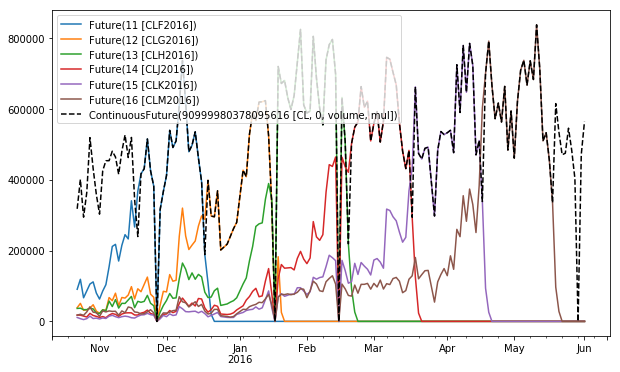

In [60]:
cl_volume_history.plot(style={cl: 'k--'}, figsize=(10,6));

In [61]:
data_portal.get_current_future_chain(cl, start_dt)

[Future(10 [CLZ2015]),
 Future(11 [CLF2016]),
 Future(12 [CLG2016]),
 Future(13 [CLH2016]),
 Future(14 [CLJ2016]),
 Future(15 [CLK2016]),
 Future(16 [CLM2016]),
 Future(17 [CLN2016]),
 Future(18 [CLQ2016]),
 Future(19 [CLU2016]),
 Future(20 [CLV2016]),
 Future(21 [CLX2016]),
 Future(22 [CLZ2016]),
 Future(23 [CLF2017]),
 Future(24 [CLG2017]),
 Future(25 [CLH2017]),
 Future(26 [CLJ2017]),
 Future(27 [CLK2017]),
 Future(28 [CLM2017]),
 Future(29 [CLN2017]),
 Future(30 [CLQ2017]),
 Future(31 [CLU2017]),
 Future(32 [CLV2017]),
 Future(33 [CLX2017]),
 Future(34 [CLZ2017]),
 Future(35 [CLF2018]),
 Future(36 [CLG2018]),
 Future(37 [CLH2018]),
 Future(38 [CLJ2018]),
 Future(39 [CLK2018]),
 Future(40 [CLM2018]),
 Future(41 [CLN2018]),
 Future(42 [CLQ2018]),
 Future(43 [CLU2018]),
 Future(44 [CLU2019]),
 Future(45 [CLU2020]),
 Future(53 [CLQ2020]),
 Future(54 [CLQ2019]),
 Future(57 [CLZ2022]),
 Future(59 [CLZ2018]),
 Future(66 [CLX2020]),
 Future(67 [CLX2019]),
 Future(68 [CLZ2019]),
 Future(69 

In [62]:
oc = bundle_data.asset_finder.get_ordered_contracts('CL')

In [63]:
clf16_sid = bundle_data.asset_finder.lookup_future_symbol('CLF2016').sid

In [64]:
oc

In [65]:
cl_contracts[0].to_dict()

{'asset_name': '',
 'auto_close_date': Timestamp('2015-12-22 00:00:00+0000', tz='UTC'),
 'end_date': Timestamp('2015-12-21 00:00:00+0000', tz='UTC'),
 'exchange': 'EXCH',
 'exchange_full': 'EXCH',
 'expiration_date': Timestamp('2016-01-15 00:00:00+0000', tz='UTC'),
 'first_traded': None,
 'multiplier': 1.0,
 'notice_date': Timestamp('2015-12-22 00:00:00+0000', tz='UTC'),
 'root_symbol': 'CL',
 'sid': 11,
 'start_date': Timestamp('2015-01-02 00:00:00+0000', tz='UTC'),
 'symbol': 'CLF2016',
 'tick_size': 0.0001}

In [68]:
chain = oc.active_chain(10, start_dt.value)

In [69]:
all_chain = bundle_data.asset_finder.retrieve_all(chain)

In [70]:
all_chain

[Future(10 [CLZ2015]),
 Future(11 [CLF2016]),
 Future(12 [CLG2016]),
 Future(13 [CLH2016]),
 Future(14 [CLJ2016]),
 Future(15 [CLK2016]),
 Future(16 [CLM2016]),
 Future(17 [CLN2016]),
 Future(18 [CLQ2016]),
 Future(19 [CLU2016]),
 Future(20 [CLV2016]),
 Future(21 [CLX2016]),
 Future(22 [CLZ2016]),
 Future(23 [CLF2017]),
 Future(24 [CLG2017]),
 Future(25 [CLH2017]),
 Future(26 [CLJ2017]),
 Future(27 [CLK2017]),
 Future(28 [CLM2017]),
 Future(29 [CLN2017]),
 Future(30 [CLQ2017]),
 Future(31 [CLU2017]),
 Future(32 [CLV2017]),
 Future(33 [CLX2017]),
 Future(34 [CLZ2017]),
 Future(35 [CLF2018]),
 Future(36 [CLG2018]),
 Future(37 [CLH2018]),
 Future(38 [CLJ2018]),
 Future(39 [CLK2018]),
 Future(40 [CLM2018]),
 Future(41 [CLN2018]),
 Future(42 [CLQ2018]),
 Future(43 [CLU2018]),
 Future(44 [CLU2019]),
 Future(45 [CLU2020]),
 Future(53 [CLQ2020]),
 Future(54 [CLQ2019]),
 Future(57 [CLZ2022]),
 Future(59 [CLZ2018]),
 Future(66 [CLX2020]),
 Future(67 [CLX2019]),
 Future(68 [CLZ2019]),
 Future(69 

In [71]:
all_chain[0].to_dict()

{'asset_name': '',
 'auto_close_date': Timestamp('2015-11-21 00:00:00+0000', tz='UTC'),
 'end_date': Timestamp('2015-11-20 00:00:00+0000', tz='UTC'),
 'exchange': 'EXCH',
 'exchange_full': 'EXCH',
 'expiration_date': Timestamp('2015-12-18 00:00:00+0000', tz='UTC'),
 'first_traded': None,
 'multiplier': 1.0,
 'notice_date': Timestamp('2015-11-21 00:00:00+0000', tz='UTC'),
 'root_symbol': 'CL',
 'sid': 10,
 'start_date': Timestamp('2015-01-02 00:00:00+0000', tz='UTC'),
 'symbol': 'CLZ2015',
 'tick_size': 0.0001}

In [72]:
all_chain[1].to_dict()

{'asset_name': '',
 'auto_close_date': Timestamp('2015-12-22 00:00:00+0000', tz='UTC'),
 'end_date': Timestamp('2015-12-21 00:00:00+0000', tz='UTC'),
 'exchange': 'EXCH',
 'exchange_full': 'EXCH',
 'expiration_date': Timestamp('2016-01-15 00:00:00+0000', tz='UTC'),
 'first_traded': None,
 'multiplier': 1.0,
 'notice_date': Timestamp('2015-12-22 00:00:00+0000', tz='UTC'),
 'root_symbol': 'CL',
 'sid': 11,
 'start_date': Timestamp('2015-01-02 00:00:00+0000', tz='UTC'),
 'symbol': 'CLF2016',
 'tick_size': 0.0001}

In [73]:
all_chain[5].to_dict()

{'asset_name': '',
 'auto_close_date': Timestamp('2016-04-21 00:00:00+0000', tz='UTC'),
 'end_date': Timestamp('2016-04-20 00:00:00+0000', tz='UTC'),
 'exchange': 'EXCH',
 'exchange_full': 'EXCH',
 'expiration_date': Timestamp('2016-05-20 00:00:00+0000', tz='UTC'),
 'first_traded': None,
 'multiplier': 1.0,
 'notice_date': Timestamp('2016-04-21 00:00:00+0000', tz='UTC'),
 'root_symbol': 'CL',
 'sid': 15,
 'start_date': Timestamp('2015-01-02 00:00:00+0000', tz='UTC'),
 'symbol': 'CLK2016',
 'tick_size': 0.0001}

In [74]:
cl_cfs = []
for i in range(5):
    cl_cfs.append(continuous_future('CL', offset=i, roll_style='volume', adjustment='mul'))

In [75]:
cl_cfs

[ContinuousFuture(90999980378095616, root_symbol='CL', offset=0, roll_style='volume', adjustment='mul'),
 ContinuousFuture(90999984673062912, root_symbol='CL', offset=1, roll_style='volume', adjustment='mul'),
 ContinuousFuture(90999988968030208, root_symbol='CL', offset=2, roll_style='volume', adjustment='mul'),
 ContinuousFuture(90999993262997504, root_symbol='CL', offset=3, roll_style='volume', adjustment='mul'),
 ContinuousFuture(90999997557964800, root_symbol='CL', offset=4, roll_style='volume', adjustment='mul')]

In [76]:
ts = history(
    assets=cl_cfs,
    end_dt=start_dt,
    bar_count=1,
    frequency='1d',
    field='price',
    data_frequency='daily'
)

In [77]:
ts.T

,2015-10-21 00:00:00+00:00
"ContinuousFuture(90999980378095616 [CL, 0, volume, mul])",45.26
"ContinuousFuture(90999984673062912 [CL, 1, volume, mul])",45.97
"ContinuousFuture(90999988968030208 [CL, 2, volume, mul])",46.67
"ContinuousFuture(90999993262997504 [CL, 3, volume, mul])",47.34
"ContinuousFuture(90999997557964800 [CL, 4, volume, mul])",47.89


In [78]:
pd.Index([c.auto_close_date for c in ts.columns])

AttributeError: 'zipline.assets.continuous_futures.ContinuousFuture' object has no attribute 'auto_close_date'

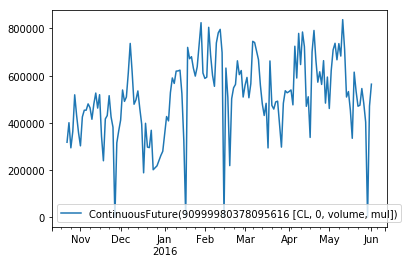

In [79]:
cl_continuous_volume.plot()

In [325]:
cf = continuous_future(
    root_symbol='US',
    offset=0,
    roll_style='volume',
    adjustment='mul'
)

In [84]:
dat = history(
    assets=[cf],
    end_dt=end_dt,
    bar_count=end_loc - start_loc,
    frequency='1d',
    field='price',
    data_frequency='daily'
)

NameError: name 'cf' is not defined

In [327]:
dat.head()

,"ContinuousFuture(96074226540281856 [US, 0, volume, mul])"
2015-10-22 00:00:00+00:00,156.906
2015-10-23 00:00:00+00:00,155.625
2015-10-26 00:00:00+00:00,156.468
2015-10-27 00:00:00+00:00,156.812
2015-10-28 00:00:00+00:00,156.375


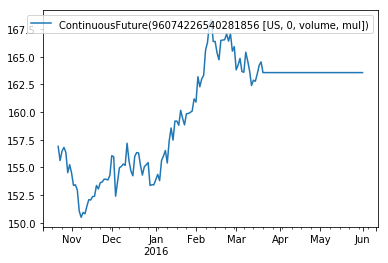

In [328]:
dat.plot()

In [329]:
US_contracts = [bundle_data.asset_finder.lookup_future_symbol(x) for x in ['USH2016', 'USM2016', 'USU2016', 'USZ2016']]

In [333]:
start_dt = pd.Timestamp('2015-10-21', tz='UTC', offset='C')
end_dt = pd.Timestamp('2016-12-29', tz='UTC', offset='C')

end_loc = trading_calendar.closes.index.get_loc(end_dt)
start_loc = trading_calendar.closes.index.get_loc(start_dt)    
    
US_consecutive_contract_volume = history(
    assets=US_contracts,
    end_dt=end_dt,
    bar_count=end_loc - start_loc,
    frequency='1d',
    field='price',
    data_frequency='daily'
)

/anaconda3/envs/env_zipline/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: offset is deprecated. Use freq instead
  """Entry point for launching an IPython kernel.
/anaconda3/envs/env_zipline/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: offset is deprecated. Use freq instead
  


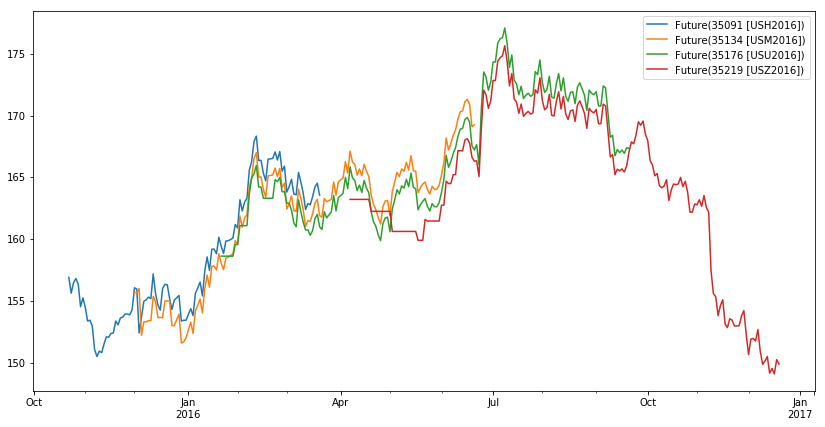

In [334]:
US_consecutive_contract_volume.plot(figsize=(14,7));

In [89]:
quandl_file = '/Users/jonathan/devwork/misc_research/zipline_install/CME_20180920.csv'

In [90]:
big_df = pd.read_csv(
        quandl_file,
        names=['symbol', 'date', 'open', 'high', 'low', 'close',
               'change', 'settle', 'volume', 'prev_day_open_int'],
        parse_dates=[1]
)

In [91]:
big_df.symbol = big_df.symbol.astype('str').str.strip()
mask1 = ~big_df.symbol.str.contains('_')
mask2 = (big_df.symbol.str.len() <=8) # ZM2018, ESU2018, CPOF2018
    #mask3 = (big_df.date > pd.Timestamp('2018-01-01'))
big_df = big_df[mask1 & mask2]

In [92]:
root = big_df.symbol.str.slice(0,2)

In [93]:
big_df.head()

,symbol,date,open,high,low,close,change,settle,volume,prev_day_open_int
0,0DF2015,2014-02-18,NaN,NaN,NaN,NaN,4.596,578.571,0.0,10.0
1,0DF2015,2014-02-19,NaN,NaN,NaN,NaN,0.862,577.709,0.0,10.0
2,0DF2015,2014-02-20,NaN,NaN,NaN,NaN,0.925,578.634,0.0,10.0
3,0DF2015,2014-02-21,NaN,NaN,NaN,NaN,1.768,576.866,3.0,10.0
4,0DF2015,2014-02-24,NaN,NaN,NaN,NaN,3.261,580.127,0.0,13.0


In [107]:
big_df[(big_df.date > pd.Timestamp('2007-10-01'))].to_csv('/Users/jonathan/devwork/misc_research/zipline_install/CME_cut_20180920.csv', header=False, index=False)


In [108]:
big_df[(root=='CL') & (big_df.date > pd.Timestamp('2015-01-01'))].to_csv('/Users/jonathan/devwork/misc_research/zipline_install/CME_CL_20180920.csv', header=False, index=False)


In [94]:
data = big_df[(root=='CL') & (big_df.date > pd.Timestamp('2015-01-01'))]

In [95]:
data.date.max()

Timestamp('2018-09-20 00:00:00')

In [96]:
data.date.min()

Timestamp('2015-01-02 00:00:00')

In [97]:
data[data.symbol=='CLG2015']

,symbol,date,open,high,low,close,change,settle,volume,prev_day_open_int
2709790,CLG2015,2015-01-02,53.76,55.11,52.03,NaN,0.58,52.69,284836.0,306406.0
2709791,CLG2015,2015-01-05,52.61,52.73,49.68,NaN,2.65,50.04,392285.0,303470.0
2709792,CLG2015,2015-01-06,50.00,50.37,47.55,NaN,2.11,47.93,478105.0,294918.0
2709793,CLG2015,2015-01-07,48.00,49.31,46.83,NaN,0.72,48.65,486387.0,279774.0
2709794,CLG2015,2015-01-08,48.78,49.65,47.73,NaN,0.14,48.79,397064.0,260411.0
2709795,CLG2015,2015-01-09,48.92,49.61,47.16,NaN,0.43,48.36,460540.0,232826.0
2709796,CLG2015,2015-01-12,48.19,48.19,45.62,NaN,2.29,46.07,424561.0,201262.0
2709797,CLG2015,2015-01-13,45.69,46.79,44.20,NaN,0.18,45.89,500542.0,177824.0
2709798,CLG2015,2015-01-14,46.16,48.91,45.01,NaN,2.59,48.48,537685.0,158294.0
2709799,CLG2015,2015-01-15,48.60,51.27,46.07,NaN,2.23,46.25,491547.0,97092.0


In [112]:
data.symbol.unique()

array(['CLF2016', 'CLF2017', 'CLF2018', 'CLF2019', 'CLF2020', 'CLF2021',
       'CLF2022', 'CLF2023', 'CLF2024', 'CLF2025', 'CLF2026', 'CLF2027',
       'CLG2015', 'CLG2016', 'CLG2017', 'CLG2018', 'CLG2019', 'CLG2020',
       'CLG2021', 'CLG2022', 'CLG2023', 'CLG2024', 'CLG2025', 'CLG2026',
       'CLG2027', 'CLH2015', 'CLH2016', 'CLH2017', 'CLH2018', 'CLH2019',
       'CLH2020', 'CLH2021', 'CLH2022', 'CLH2023', 'CLH2024', 'CLH2025',
       'CLH2026', 'CLJ2015', 'CLJ2016', 'CLJ2017', 'CLJ2018', 'CLJ2019',
       'CLJ2020', 'CLJ2021', 'CLJ2022', 'CLJ2023', 'CLJ2024', 'CLJ2025',
       'CLJ2026', 'CLK2015', 'CLK2016', 'CLK2017', 'CLK2018', 'CLK2019',
       'CLK2020', 'CLK2021', 'CLK2022', 'CLK2023', 'CLK2024', 'CLK2025',
       'CLK2026', 'CLM2015', 'CLM2016', 'CLM2017', 'CLM2018', 'CLM2019',
       'CLM2020', 'CLM2021', 'CLM2022', 'CLM2023', 'CLM2024', 'CLM2025',
       'CLM2026', 'CLN2015', 'CLN2016', 'CLN2017', 'CLN2018', 'CLN2019',
       'CLN2020', 'CLN2021', 'CLN2022', 'CLN2023', 

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73343 entries, 2683796 to 3035013
Data columns (total 10 columns):
symbol               73343 non-null object
date                 73343 non-null datetime64[ns]
open                 23033 non-null float64
high                 26074 non-null float64
low                  26382 non-null float64
close                21420 non-null float64
change               72812 non-null float64
settle               73343 non-null float64
volume               73343 non-null float64
prev_day_open_int    73343 non-null float64
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 6.2+ MB


In [114]:
def quandl_symbol_split(symbol):
    l = len(symbol)
    year = int(symbol[l-4:l+1])
    month_letter = symbol[l-5:l-4]
    root_symbol = symbol[:l-5]
    return root_symbol, month_letter, year

In [115]:
import numpy as np

In [116]:
data.reset_index(drop=True)

,symbol,date,open,high,low,close,change,settle,volume,prev_day_open_int
0,CLF2016,2015-01-02,60.03,60.70,58.87,NaN,0.39,59.58,782.0,36567.0
1,CLF2016,2015-01-05,59.03,59.09,57.38,NaN,1.93,57.65,3221.0,36642.0
2,CLF2016,2015-01-06,57.20,57.36,55.20,NaN,2.08,55.57,2236.0,37668.0
3,CLF2016,2015-01-07,55.44,56.15,54.81,NaN,0.09,55.66,1944.0,37689.0
4,CLF2016,2015-01-08,56.10,56.10,54.85,NaN,0.14,55.80,2294.0,37321.0
5,CLF2016,2015-01-09,55.85,56.20,54.67,NaN,0.10,55.90,1447.0,37518.0
6,CLF2016,2015-01-12,55.82,55.82,53.81,NaN,1.68,54.22,1139.0,37586.0
7,CLF2016,2015-01-13,53.90,54.50,52.55,NaN,0.14,54.08,2143.0,37825.0
8,CLF2016,2015-01-14,53.49,55.86,53.48,NaN,1.55,55.63,1614.0,37806.0
9,CLF2016,2015-01-15,55.16,57.36,53.74,NaN,1.84,53.79,2875.0,37549.0


In [117]:
data=data.assign(root_symbol='')
data=data.assign(exp_month_letter= '')
data=data.assign(exp_year=-1)

In [118]:
for index, row in data.iterrows():
    a, b, c = quandl_symbol_split(row.symbol)
    #print(
    #    str(index) + ": " + str(a) + ":" + str(b) + ":" + str(c)
    #)
    data.loc[index, 'root_symbol'], data.loc[index, 'exp_month_letter'], data.loc[index, 'exp_year'] = a, b, c

KeyboardInterrupt: 

In [ ]:
data.head()

In [ ]:
data=data.assign(expiration_date=-1)

In [ ]:
def third_friday(year, month):
    """Return datetime.date for monthly 3rd Friday expiration given year and
    month
    """
    # The 15th is the lowest third day in the month
    third = datetime.date(year, month, 15)
    # What day of the week is the 15th?
    w = third.weekday()
    # Friday is weekday 4
    if w != 4:
        # Replace just the day (of month)
        third = third.replace(day=(15 + (4 - w) % 7))
    return third

In [ ]:
data['expiration_date'] = data.apply(lambda x: third_friday(x.exp_year, x.exp_month), axis=1)

In [80]:
hangs on _get_single_asset_value

SyntaxError: invalid syntax (<ipython-input-80-0278f9986cdb>, line 1)

In [36]:
start_dt = pd.Timestamp('2015-01-02', tz='UTC', offset='C')
end_dt = pd.Timestamp('2015-01-30', tz='UTC', offset='C')

end_loc = trading_calendar.closes.index.get_loc(end_dt)
start_loc = trading_calendar.closes.index.get_loc(start_dt)    

clg2015 = history(
    assets=[bundle_data.asset_finder.lookup_future_symbol('CLG2015')],
    end_dt=end_dt,
    bar_count=end_loc - start_loc,
    frequency='1d',
    field='price',
    data_frequency='daily'
)


/anaconda3/envs/env_zipline/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: offset is deprecated. Use freq instead
  """Entry point for launching an IPython kernel.
/anaconda3/envs/env_zipline/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: offset is deprecated. Use freq instead
  


In [37]:
clg2015

,Future(0 [CLG2015])
2015-01-05 00:00:00+00:00,50.04
2015-01-06 00:00:00+00:00,47.93
2015-01-07 00:00:00+00:00,48.65
2015-01-08 00:00:00+00:00,48.79
2015-01-09 00:00:00+00:00,48.36
2015-01-12 00:00:00+00:00,46.07
2015-01-13 00:00:00+00:00,45.89
2015-01-14 00:00:00+00:00,48.48
2015-01-15 00:00:00+00:00,46.25
2015-01-16 00:00:00+00:00,48.69


In [ ]:
THERE ARE NANs in the close price
